<a href="https://colab.research.google.com/github/Marlianur09/diabetic-cbir-project-heroku-main/blob/main/TKC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import random

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [ ]:
train = pd.read_csv('aptos2019-blindness-detection/train.csv')
test = pd.read_csv('aptos2019-blindness-detection/test.csv')
submission= pd.read_csv('aptos2019-blindness-detection/sample_submission.csv')
train_dir = 'aptos2019-blindness-detection/train_images'

In [ ]:
print('Number of train samples: ', train.shape[0])
print('Number of test samples: ', test.shape[0])
display(train.head())

Number of train samples:  3662
Number of test samples:  1928


,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0


In [ ]:
NoDR = train[train["diagnosis"] == 0]
NoDR.to_csv("Test/NoDR.csv")
NoDR.head()

,id_code,diagnosis
3,002c21358ce6,0
4,005b95c28852,0
6,0097f532ac9f,0
10,00cc2b75cddd,0
12,00f6c1be5a33,0


In [ ]:
Mild = train[train["diagnosis"] == 1]
Mild.to_csv("Test/Mild.csv")
Mild.head()

,id_code,diagnosis
2,0024cdab0c1e,1
9,00cb6555d108,1
14,0124dffecf29,1
22,01b3aed3ed4c,1
45,0369f3efe69b,1


In [ ]:
Moderate = train[train["diagnosis"] == 2]
Moderate.to_csv("Test/Moderate.csv")
Moderate.head()

,id_code,diagnosis
0,000c1434d8d7,2
7,00a8624548a9,2
8,00b74780d31d,2
11,00e4ddff966a,2
16,012a242ac6ff,2


In [ ]:
Severe = train[train["diagnosis"] == 3]
Severe.to_csv("Test/Severe.csv")
Severe.head()

,id_code,diagnosis
13,0104b032c141,3
49,03c85870824c,3
56,042470a92154,3
74,05cd0178ccfe,3
81,069f43616fab,3


In [ ]:
Proliferative_DR = train[train["diagnosis"] == 4]
Proliferative_DR.to_csv("Test/Proliferative_DR.csv")
Proliferative_DR.head()

,id_code,diagnosis
1,001639a390f0,4
5,0083ee8054ee,4
32,0243404e8a00,4
34,02685f13cefd,4
38,02dda30d3acf,4


In [ ]:
train_0 = pd.read_csv('Test/NoDR.csv')
train_1 = pd.read_csv('Test/Mild.csv')
train_2 = pd.read_csv('Test/Moderate.csv')
train_3 = pd.read_csv('Test/Severe.csv')
train_4 = pd.read_csv('Test/Proliferative_DR.csv')

In [ ]:
from random import shuffle

target_dir = 'Test/Gantinama'
shuffle(train_0['id_code'])
shuffle(train_1['id_code'])
shuffle(train_2['id_code'])
shuffle(train_3['id_code'])
shuffle(train_4['id_code'])


for i, img_name in enumerate(train_0['id_code']):
    img = cv2.imread("aptos2019-blindness-detection/train_images/%s.png" % img_name)
    file_name = f"NoDR-{i + 1}.png"
    dest = os.path.join(target_dir, file_name)
    
    cv2.imwrite(dest, img)

for i, img_name in enumerate(train_1['id_code']):
    img = cv2.imread("aptos2019-blindness-detection/train_images/%s.png" % img_name)
    file_name = f"Mild{i + 1}.png"
    dest = os.path.join(target_dir, file_name)
    
    cv2.imwrite(dest, img)

for i, img_name in enumerate(train_2['id_code']):
    img = cv2.imread("aptos2019-blindness-detection/train_images/%s.png" % img_name)
    file_name = f"Moderate{i + 1}.png"
    dest = os.path.join(target_dir, file_name)
    
    cv2.imwrite(dest, img)

for i, img_name in enumerate(train_3['id_code']):
    img = cv2.imread("aptos2019-blindness-detection/train_images/%s.png" % img_name)
    file_name = f"Severe{i + 1}.png"
    dest = os.path.join(target_dir, file_name)
    
    cv2.imwrite(dest, img)

for i, img_name in enumerate(train_4['id_code']):
    img = cv2.imread("aptos2019-blindness-detection/train_images/%s.png" % img_name)
    file_name = f"Proliferative_DR{i + 1}.png"
    dest = os.path.join(target_dir, file_name)
    
    cv2.imwrite(dest, img)


C:\Users\Asus\AppData\Local\Programs\Python\Python39\lib\random.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[i], x[j] = x[j], x[i]


In [ ]:
!pip install opencv-python

In [ ]:
!pip install seaborn

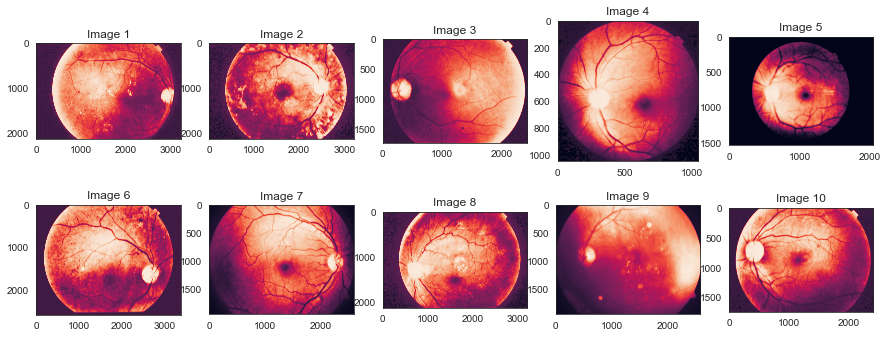

In [ ]:
import seaborn as sns
import cv2
sns.set_style("white")
count = 1
plt.figure(figsize=[15, 15])
for img_name in train['id_code'][:10]:
    img = cv2.imread("aptos2019-blindness-detection/train_images/%s.png" % img_name)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    clahe = cv2.createCLAHE(clipLimit=2.0,
	  tileGridSize=(8, 8))
    equalized = cv2.equalizeHist(img)
    plt.subplot(5, 5, count)
    plt.imshow(equalized)
    plt.title("Image %s" % count)
    count += 1
    
plt.show()

In [ ]:
train["id_code"] = train["id_code"].apply(lambda x: x + ".png")
test["id_code"] = test["id_code"].apply(lambda x: x + ".png")
train['diagnosis'] = train['diagnosis'].astype('str')
train.head()

,id_code,diagnosis
0,000c1434d8d7.png,2
1,001639a390f0.png,4
2,0024cdab0c1e.png,1
3,002c21358ce6.png,0
4,005b95c28852.png,0


In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255, 
                                 validation_split=0.2,
                                 horizontal_flip=True)

train_generator=train_datagen.flow_from_dataframe(
    dataframe=train,
    directory="aptos2019-blindness-detection/train_images/",
    x_col="id_code",
    y_col="diagnosis",
    batch_size=16,
    class_mode="categorical",
    target_size=(224, 224),
    subset='training',
    color_mode='rgb')

Found 2930 validated image filenames belonging to 5 classes.


In [ ]:
valid_generator=train_datagen.flow_from_dataframe(
    dataframe=train,
    directory="aptos2019-blindness-detection/train_images/",
    x_col="id_code",
    y_col="diagnosis",
    batch_size=16,
    class_mode="categorical",    
    target_size=(224, 224),
    subset='validation',
    color_mode='rgb')

Found 732 validated image filenames belonging to 5 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_dataframe(  
        dataframe=test,
        directory = "aptos2019-blindness-detection/test_images/",
        x_col="id_code",
        target_size=(224, 224),
        batch_size=16,
        shuffle=False,
        class_mode=None)

Found 1928 validated image filenames.


In [ ]:
import tensorflow as tf
from tensorboard.plugins.hparams import api as hp

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.layers import InputLayer, Activation, Dense, Conv2D, MaxPool2D, Dropout, Flatten, BatchNormalization, AveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

C:\Users\Asus\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
from tensorflow.keras.applications.mobilenet import MobileNet, preprocess_input

In [ ]:
base_model4 = MobileNet(input_shape=(224,224,3),include_top=False,weights="imagenet")

In [ ]:
class Combin3:
  def build(base_model1,classes):
    headModel = base_model1.output
    headModel = Flatten(name="flatten")(headModel)
    headModel = Dense(128, activation='relu')(headModel)
    headModel = Dropout(0.5)(headModel)
    headModel = Dense(classes, activation='softmax')(headModel)
    return headModel



In [ ]:
headModel4 = Combin3.build(base_model4, 5)
model5 =Model(inputs=base_model4.input, outputs=headModel4)

In [ ]:

for layer in base_model4.layers:
  layer.trainable = False

In [ ]:
model5.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

In [ ]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.metrics import Precision, Recall
model5.compile(
    optimizer=Adam(lr=0.00001, decay= 0.001/20),
    loss ='categorical_crossentropy',
    metrics =['accuracy',
              tf.keras.metrics.Precision(name='precision'),
              tf.keras.metrics.Recall(name='recall')]
)

C:\Users\Asus\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
test3=model5.fit(
    train_generator,
     validation_data = valid_generator,
     epochs=100,
     steps_per_epoch= 50,
     batch_size=20

)

Epoch 1/100
50/50 [==============================] - 139s 3s/step - loss: 0.6992 - accuracy: 0.7525 - precision: 0.8160 - recall: 0.6650 - val_loss: 0.6637 - val_accuracy: 0.7568 - val_precision: 0.8319 - val_recall: 0.6489
Epoch 2/100
50/50 [==============================] - 132s 3s/step - loss: 0.6347 - accuracy: 0.7575 - precision: 0.8268 - recall: 0.6862 - val_loss: 0.6587 - val_accuracy: 0.7637 - val_precision: 0.8297 - val_recall: 0.6721
Epoch 3/100
50/50 [==============================] - 130s 3s/step - loss: 0.6102 - accuracy: 0.7725 - precision: 0.8361 - recall: 0.7013 - val_loss: 0.6693 - val_accuracy: 0.7623 - val_precision: 0.8518 - val_recall: 0.6516
Epoch 4/100
50/50 [==============================] - 129s 3s/step - loss: 0.5865 - accuracy: 0.7723 - precision: 0.8326 - recall: 0.7023 - val_loss: 0.6624 - val_accuracy: 0.7541 - val_precision: 0.8148 - val_recall: 0.7090
Epoch 5/100
50/50 [==============================] - 132s 3s/step - loss: 0.6217 - accuracy: 0.7775 - pr

In [ ]:
model5.save('model/TKC/modelmobile_1(1).h5')

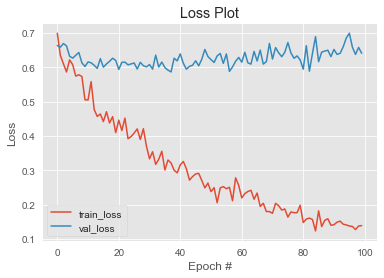

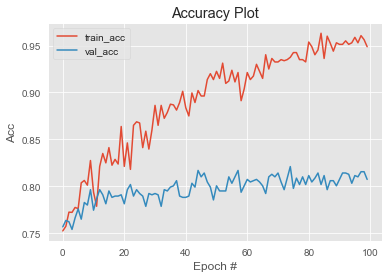

In [ ]:
import matplotlib.pyplot as plt

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), test3.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), test3.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), test3.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 100), test3.history["val_accuracy"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

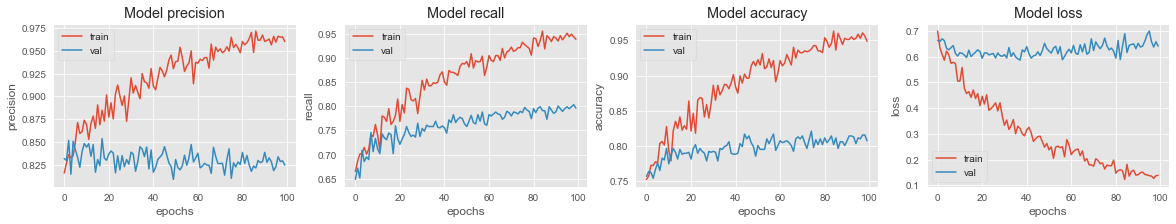

In [ ]:
fig, ax = plt.subplots(1, 4, figsize=(20, 3))
ax = ax.ravel()

for i, met in enumerate(['precision', 'recall', 'accuracy', 'loss']):
    ax[i].plot(test3.history[met])
    ax[i].plot(test3.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

In [ ]:
plt.savefig("model/Moduul6/modelmobile.svg")

<Figure size 432x288 with 0 Axes>

In [ ]:
class FeatureExtractor:
    def __init__(self, model):
        self.model = model
    
    def extract(self, img):
        img = img.resize((224, 224))
        img = img.convert('RGB')
        
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        
        feature = self.model.predict(x)[0]
        
        return feature / np.linalg.norm(feature)

fe = FeatureExtractor(load_model('model/TKC/modelmobile_1(1).h5', compile=False))

In [ ]:
from pathlib import Path
from PIL import Image
from tensorflow.keras.preprocessing import image
base_dir = 'Test/img2'
feature_dir = 'Test/feature_extract'

img_paths = list()
features = list()

for img_path in sorted(Path(base_dir).glob("*.jpg")):
    img_paths.append(img_path)
    feature = fe.extract(img=Image.open(img_path))
    features.append(feature)

features = np.array(features)
np.save(feature_dir + '/extracted_feature+.npy', features)

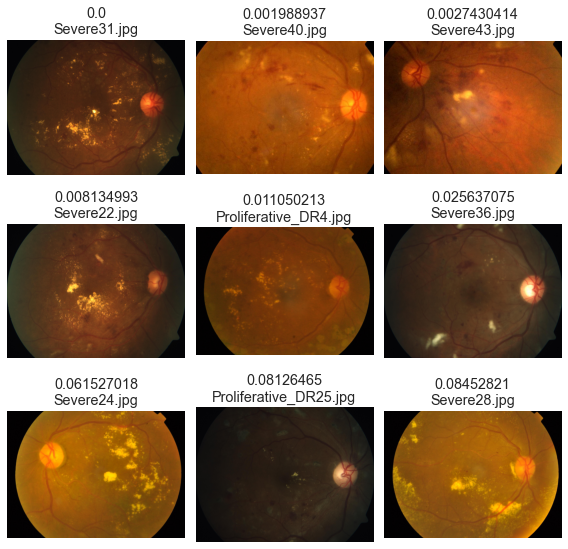

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os

query_image = img_paths[224]
img = Image.open(query_image)

query = fe.extract(img)

dists = np.linalg.norm(features - query, axis=1)

# Extract 9 images that have lowest distance
ids = np.argsort(dists)[:9]
scores = [(dists[id], img_paths[id]) for id in ids]

# Visualize the result
axes = list()
fig = plt.figure(figsize=(8,8))

for a in range(3 * 3):
    axes.append(fig.add_subplot(3, 3, a+1))

    score = scores[a]

    nama_citra = os.path.basename(score[1])

    subplot_title = str(score[0]) + f"\n{nama_citra}"
    axes[-1].set_title(subplot_title)  

    plt.axis('off')
    plt.imshow(Image.open(score[1]))

fig.tight_layout()
plt.show()

In [ ]:
#test
loss, acc, prec, rec = model5.evaluate(valid_generator)
print(f"Accuracy = {acc * 100:.2f} %")
print(f"Precision = {prec * 100:.2f} %")
print(f"Recall = {rec * 100:.2f} %")

46/46 [==============================] - 94s 2s/step - loss: 0.7002 - accuracy: 0.8033 - precision: 0.8197 - recall: 0.7828
Accuracy = 80.33 %
Precision = 81.97 %
Recall = 78.28 %


In [ ]:
from pathlib import Path
from PIL import Image

inputPath = Path("Test/img")
inputFiles = inputPath.glob("**/*.png")
outputPath = Path("Test")
for f in inputFiles:
    outputFile = outputPath / Path(f.stem + ".jpg")
    im = Image.open(f)
    im.save(outputFile)